In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Looking at the data

In [2]:
df_3 = pd.read_csv('data\station_40.csv')
df_1 = pd.read_csv('data\station_49.csv')
df_4 = pd.read_csv('data\station_63.csv')
df_2 = pd.read_csv('data\station_80.csv')

In [3]:
df_3.head()

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15,W_16,W_17,W_18,YIELD
0,0,21.389266,26.985066,23.813756,26.852214,25.096705,26.852109,25.730293,23.416002,21.038240,5.739711,2.787364,1.843174,1.549155,0.394481,2.868049,1.587736,3.046101,2.680206,10.32
1,1,21.314074,22.516442,24.072042,29.159849,29.522392,26.567033,28.249854,24.606161,19.268685,1.891106,3.610893,2.148366,2.317832,0.822936,2.606934,1.883197,1.297795,7.477726,10.39
2,2,20.875083,26.038845,24.516708,27.633776,26.951667,27.926496,26.534607,25.968638,23.554623,4.745318,1.872529,4.237160,0.086909,1.460638,2.163314,7.340032,3.863088,2.659763,8.49
3,3,20.553688,20.992986,22.859027,28.654018,26.705206,24.458350,25.146936,21.531644,22.961974,8.479863,5.067890,3.836785,0.239243,0.113061,3.535262,4.748053,0.914197,0.926442,7.28
4,4,21.523342,21.542900,23.034072,26.327315,30.362289,27.503657,27.839165,29.764479,18.290963,3.405621,0.363119,1.941876,0.259491,0.814974,1.240040,0.611056,1.746779,1.708829,7.31


<Axes: >

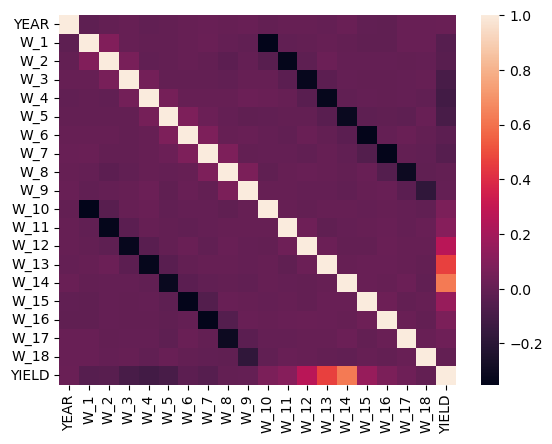

In [4]:
sns.heatmap(df_1.corr())
# On voit que yield particulièrement coorélé avec W_12 - W_16 (pluie sur juin - septembre)
# On voit que à chaque fois W_i négativement corrélé avec w_{i+9} (chaud négativement corrélé avec pluie)
# On voit que légèrement corrélé avec ses voisins

(array([736., 816., 825., 831., 840., 764., 742., 691., 596., 543., 469.,
        394., 321., 291., 237., 177., 146., 126.,  83.,  81.,  60.,  47.,
         38.,  28.,  19.,  17.,  18.,  12.,  13.,  10.,   9.,   1.,   1.,
          2.,   3.,   2.,   2.,   2.,   2.,   1.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.18786614, 0.37573228, 0.56359842, 0.75146456,
        0.9393307 , 1.12719684, 1.31506298, 1.50292912, 1.69079526,
        1.8786614 , 2.06652754, 2.25439368, 2.44225983, 2.63012597,
        2.81799211, 3.00585825, 3.19372439, 3.38159053, 3.56945667,
        3.75732281, 3.94518895, 4.13305509, 4.32092123, 4.50878737,
        4.69665351, 4.88451965, 5.07238579, 5.26025193, 5.44811807,
        5.63598421, 5.82385035, 6.01171649, 6.19958263, 6.38744877,
        6.57531491, 6.76318105, 6.95104719, 7.13891333, 7.32677948,
        7.51464562, 7.70251176, 7.8903779 , 8.07824404, 8.26611018,
        8.45397632, 8.64184246, 8.8297086 , 9.

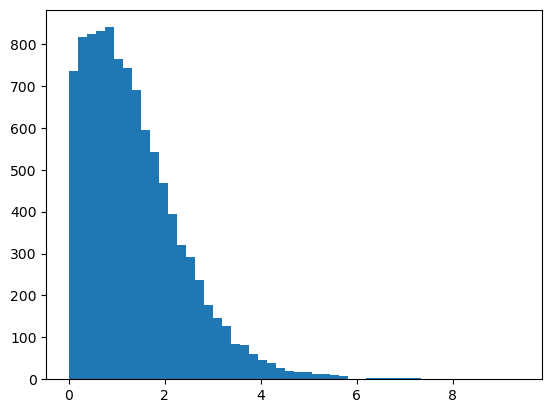

In [27]:
plt.hist(full_df["W_13_1"], bins=50)

In [6]:
import ydata_profiling
# df_1.profile_report() 

# On voit que les W_1 - W_9 sont Gaussiens, en revanche les W_10-W_18 suivent plutôt une loi gamma
# YIELD suit une loi normale, mais plafonnée à 15,75

In [16]:
col1 = [col + '_1' for col in df_1.columns]
col2 = [col + '_2' for col in df_2.columns]
col3 = [col + '_3' for col in df_3.columns]
col4 = [col + '_4' for col in df_4.columns]
col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

df_1.columns = col1
df_2.columns = col2
df_3.columns = col3
df_4.columns = col4

In [17]:

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_10_4,W_11_4,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.462204,3.951453,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.036085,0.879651,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.295700,2.556876,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.872424,3.686682,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,2.240781,2.920387,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,19.910307,22.597290,24.226184,25.019894,30.213377,26.890826,23.807550,24.569550,19.803263,...,2.426476,1.900861,1.052215,3.417013,1.785800,3.001559,1.358065,0.720322,0.660601,7.09
9996,9996,17.775542,21.499263,22.323207,27.072953,25.665768,29.337247,27.551202,22.894673,15.346937,...,3.747899,2.996599,1.233947,2.103529,1.401657,0.969551,0.378349,3.278026,2.730786,1.09
9997,9997,16.690802,23.614112,25.737512,28.410411,29.137417,24.086242,26.042368,25.386909,18.531787,...,3.740013,1.543837,2.379303,0.647621,0.690797,1.833635,3.510114,0.281663,3.717580,5.10
9998,9998,19.488528,23.736181,23.895066,28.550779,25.095031,27.253641,24.912120,24.014287,18.288172,...,3.875491,1.720552,1.044864,1.425547,3.465486,2.408919,1.346895,1.014101,1.062314,4.86


<Axes: >

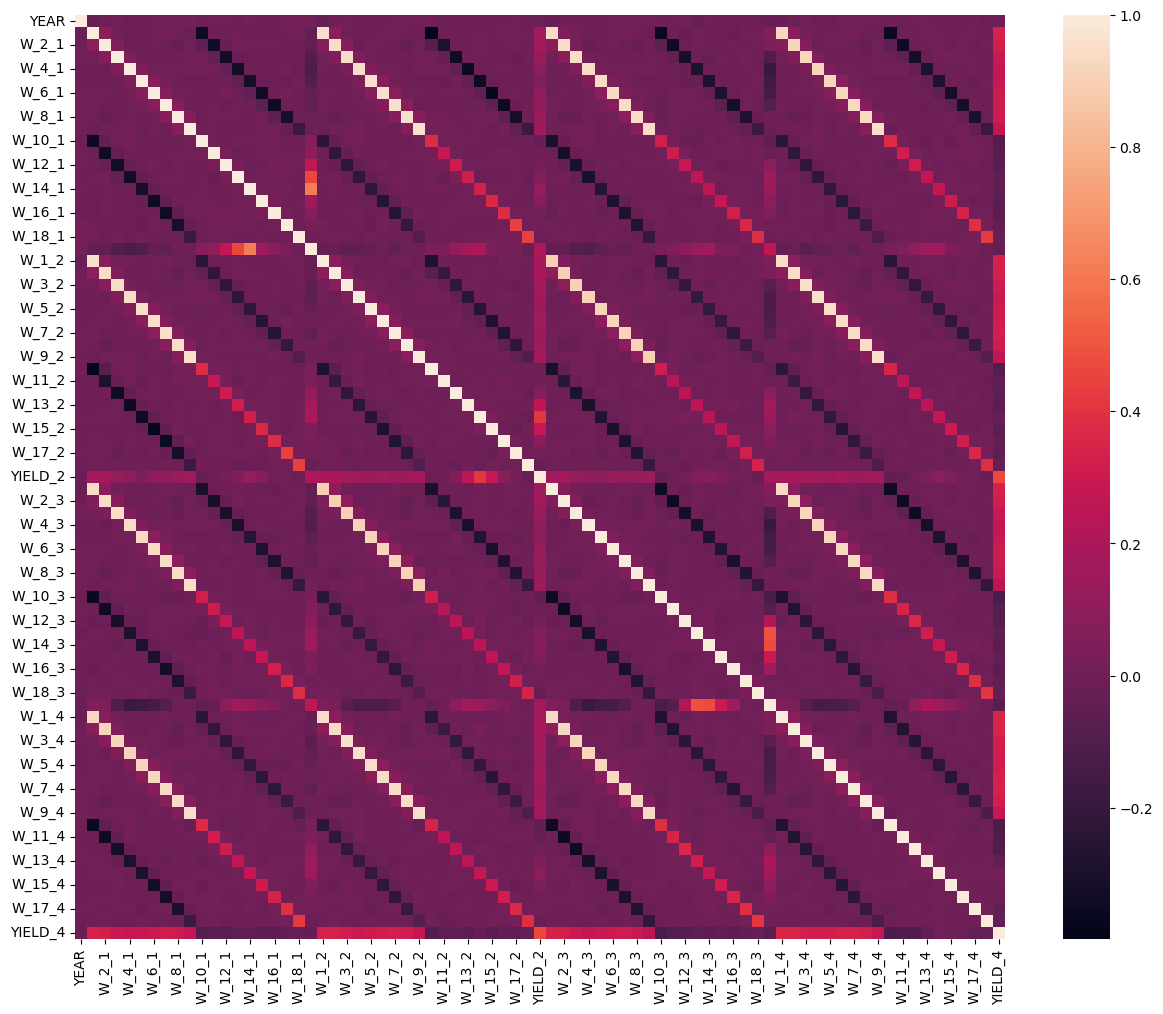

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(full_df.corr())


In [31]:
import plotly.express as px
fig = px.histogram(df_1, x="W_14_1")
fig.show()

In [37]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df_1["W_14_1"]], ["distplot"], bin_size=0.1)
fig.show()

## Can we predict Y from the W?

In [9]:
from sklearn.model_selection import train_test_split

target_40 = df_3["YIELD"]
data_40 = df_3.drop(columns=["YIELD", "YEAR"])

data_train_40, data_test_40, target_train_40, target_test_40 = train_test_split(
    data_40, target_40, test_size = 0.2, random_state=42
)

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), Ridge())

pipe.fit(data_train_40, target_train_40)
prediction = pipe.predict(data_test_40)
mean_squared_error(prediction, target_test_40)

1.676210963277208

In [11]:
df_3["YIELD"].mean()

11.395634

In [12]:
pipe[1].coef_

array([ 5.56217199e-02, -5.35597327e-03, -8.39011061e-02, -8.73101069e-02,
       -1.58169306e-02, -1.05649513e-01, -7.90303247e-02,  9.50654643e-03,
        2.64795112e-03, -2.61796297e-01, -2.26961946e-01,  4.32330123e-01,
        1.07582409e+00,  1.06188551e+00,  6.40455530e-01,  2.92374804e-01,
       -2.64485142e-04, -1.10647025e-02])

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(data_train_40, target_train_40)
prediction = model.predict(data_test_40)
mean_squared_error(prediction, target_test_40) / df_3["YIELD"].mean()


0.11440102483639697

In [14]:
feature_importances = model.feature_importances_
features = np.vstack((np.array(data_train_40.columns),
                     np.array(feature_importances))).T
impor = pd.DataFrame(sorted(features, key=lambda x: x[1], reverse=True))
impor

,0,1
0,W_14,0.297234
1,W_13,0.265133
2,W_15,0.106825
3,W_12,0.093433
4,W_11,0.038478
5,W_16,0.038378
6,W_10,0.036781
7,W_3,0.012895
8,W_7,0.012499
9,W_5,0.012142


In [15]:
np.sum(impor[1][:3])

0.6691917032003403

# Looking at epsilon data only

In [17]:
Q = [3.3241, 5.1292, 6.4897, 7.1301]
mask = (df_1[["W_13", "W_14", "W_15"]].sum(axis=1) < Q[0]) & (df_2[["W_13", "W_14", "W_15"]].sum(axis=1) < Q[1]) & (df_3[["W_13", "W_14", "W_15"]].sum(axis=1) < Q[2]) & (df_4[["W_13", "W_14", "W_15"]].sum(axis=1) < Q[3])
df_1_part = df_1[mask]
df_2_part = df_2[mask]
df_3_part = df_3[mask]
df_4_part = df_4[mask]

df_1_part["Station"] = 1
df_2_part["Station"] = 2
df_3_part["Station"] = 3
df_4_part["Station"] = 4

df_1_part

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_11,W_12,W_13,W_14,W_15,W_16,W_17,W_18,YIELD,Station
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.467149,1.357827,0.875649,0.305032,1.673852,0.214576,0.533683,1.496904,5.54,1
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,0.381546,0.949828,0.220260,1.074115,0.040914,0.605979,0.559963,0.682941,4.39,1
10,10,23.067487,21.989987,26.730305,27.207224,28.277049,26.121537,30.583426,22.363784,15.826520,...,1.795475,0.345985,0.382794,0.215382,1.725849,0.083205,1.516085,2.485251,4.07,1
28,28,24.441997,24.273763,23.400111,27.344886,25.011067,28.047828,25.841452,20.996116,16.747943,...,0.263892,3.241495,0.605714,0.141720,0.940132,0.281891,0.767335,1.129858,4.77,1
33,33,21.562630,22.283709,25.263382,25.713687,28.258033,28.984649,26.601343,23.831066,17.453389,...,1.806542,3.405140,1.460973,0.299190,1.387668,1.086085,0.664143,2.649646,4.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,9932,20.727074,21.049957,22.076089,24.532930,27.892463,27.492863,28.687003,22.284578,18.464562,...,0.511038,3.191038,0.971027,0.765645,0.450004,0.135279,0.693551,1.936565,5.94,1
9961,9961,18.227577,28.465454,24.221706,23.768921,27.306393,28.379903,25.283359,22.363430,17.239503,...,0.311604,0.690322,1.342535,0.617727,0.725443,0.590940,1.258960,1.732204,4.00,1
9987,9987,18.393095,18.849918,24.745502,25.614881,26.017482,25.460018,22.976764,18.977460,17.655078,...,2.215472,2.410025,0.106265,1.116415,0.216162,0.725135,0.172526,1.004489,4.32,1
9996,9996,17.775542,21.499263,22.323207,27.072953,25.665768,29.337247,27.551202,22.894673,15.346937,...,1.630360,1.645829,0.111998,1.125856,0.169407,1.167883,0.912262,1.201698,4.55,1


In [18]:
# df_1_part.profile_report() 


## Simulating Y with Gaussian models by hand

In [25]:
print(df_4_part["YIELD"].mean())
print(df_4_part["YIELD"].std())

3.3169299999999997
1.9272543123013854


In [26]:
def yield_4_gen():
    res = np.random.normal(3.32, 1.87, 1000)
    return (res > 0) * res

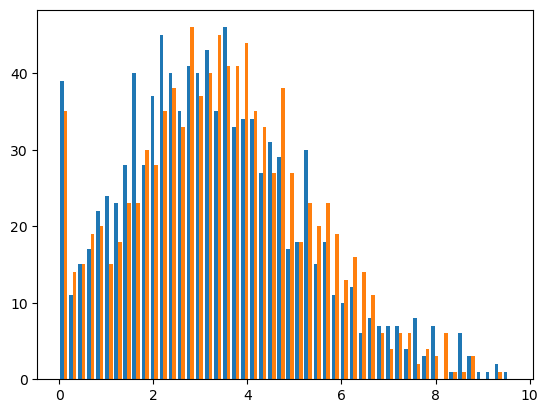

In [27]:
plt.hist([df_4_part["YIELD"], yield_4_gen()], bins=50)
plt.show()

In [28]:
def yield_2_gen():
    simul = np.stack((np.random.normal(7.5, 1.5, 1000), np.random.normal(5, 1, 1000)))
    random = np.random.randint(0, 2, 1000)
    return [simul[random[i], i] for i in range(1000)]


[]

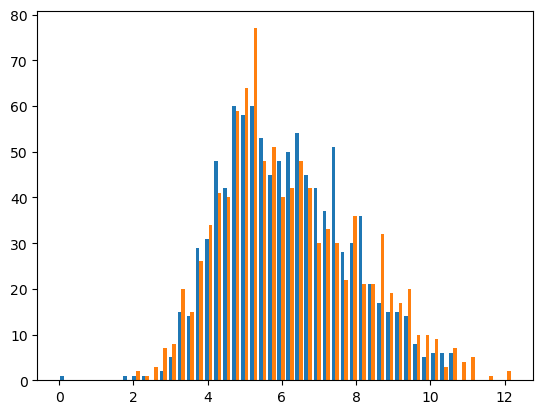

In [29]:
plt.hist([df_2_part["YIELD"], yield_2_gen()], bins=50)
plt.plot()

[]

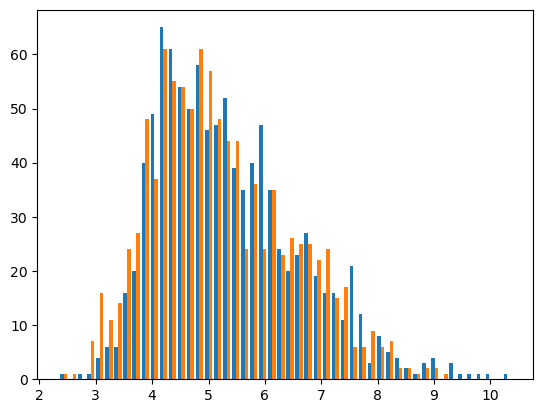

In [30]:
def yield_1_gen():
    simul = np.stack((np.random.normal(6, 1.2, 1000), np.random.normal(4.5, 0.7, 1000)))
    random = np.random.randint(0, 2, 1000)
    return [simul[random[i], i] for i in range(1000)]

plt.hist([df_1_part["YIELD"], yield_1_gen()], bins=50)
plt.plot()

[]

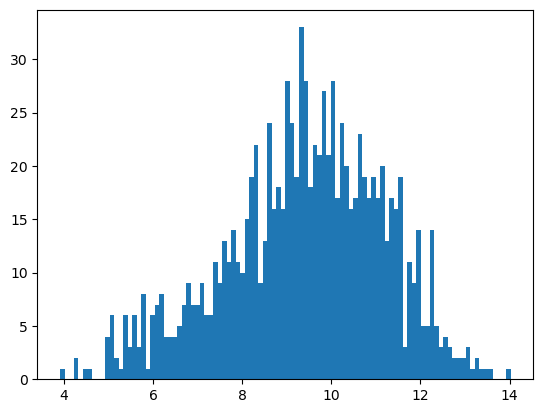

In [31]:
plt.hist([df_3_part["YIELD"]], bins=100)
plt.plot()

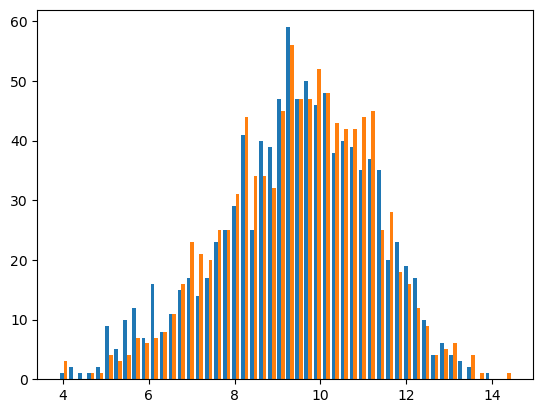

In [32]:
def yield_3_gen():
    simul = np.stack((np.random.normal(10.5, 1.2, 1000), np.random.normal(8.3, 1.5, 1000)))
    random = np.random.randint(0, 2, 1000)
    return [simul[random[i], i] for i in range(1000)]

plt.hist([df_3_part["YIELD"], yield_3_gen()], bins=50)
plt.show()


In [33]:
##### CHECKING THAT IT WORKS

import ot

gen_yields = np.stack((yield_1_gen(), yield_2_gen(), yield_3_gen(), yield_4_gen())).T
subset_yields = pd.read_csv('CSVs/yields_subset.csv').iloc[:, 2:]

yield_1_true = subset_yields.to_numpy()

print(ot.sliced.sliced_wasserstein_distance(yield_1_true, gen_yields, seed=0))

0.21463431721666093


# Making a clean Gaussian Mixture Model

In [186]:
df_1234 = pd.read_csv('CSVs/yields_subset.csv').iloc[:, 2:]

In [187]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, n_init=10)
gm.fit(df_1234)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

GaussianMixture(n_components=4, n_init=10)

In [36]:
print(f"weights: {gm.weights_}")
print(f"means: {gm.means_}")
print(f"cov: {gm.covariances_}")

weights: [0.27715344 0.20096278 0.29128935 0.23059443]
means: [[ 5.86139258  5.47258616 10.01731076  2.37522567]
 [ 6.22803832  7.54221428  9.94444073  5.41015488]
 [ 4.45036279  5.89044195  9.00801259  2.03327243]
 [ 5.17140725  6.16101857  8.63111601  4.24605948]]
cov: [[[ 1.37311213  0.37050471 -0.1220308  -0.13597099]
  [ 0.37050471  1.48607932  0.04623979  0.38212167]
  [-0.1220308   0.04623979  2.10485304  0.08260514]
  [-0.13597099  0.38212167  0.08260514  1.53346726]]

 [[ 2.00022227  0.09349971  0.55859889 -0.58626785]
  [ 0.09349971  2.63946873  0.30244702  0.14417689]
  [ 0.55859889  0.30244702  2.42219462 -0.84805622]
  [-0.58626785  0.14417689 -0.84805622  3.54088705]]

 [[ 0.33173435  0.05435465  0.17715039 -0.09603362]
  [ 0.05435465  2.44814558  0.64228091  1.16399535]
  [ 0.17715039  0.64228091  3.3856295   0.17516865]
  [-0.09603362  1.16399535  0.17516865  1.5199807 ]]

 [[ 1.02678545  0.30980978 -0.20535768 -0.41943644]
  [ 0.30980978  2.72618676  0.11910392 -0.2126

In [188]:
simul = gm.sample(1000)[0]
simul[:, 3] = simul[:, 3] * (simul[:, 3] > 0)

In [192]:
simul.std(axis=0)

array([1.31873255, 1.63193207, 1.76663013, 1.88897885])

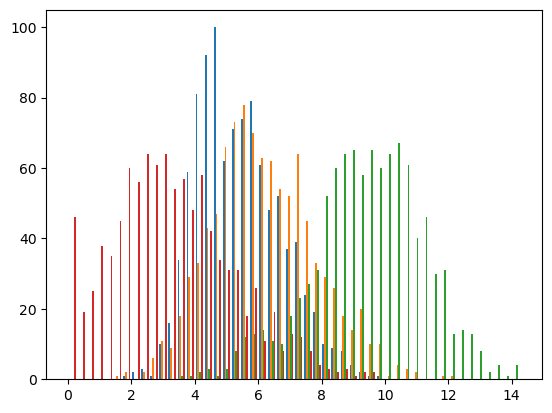

In [190]:
plt.hist(simul, bins = 50)
plt.show()

In [39]:
yield_1_true = pd.read_csv('CSVs/yields_subset.csv').iloc[:, 2:].to_numpy()

print(ot.sliced.sliced_wasserstein_distance(yield_1_true, simul, seed=0))

0.13921927204833545


In [40]:
def GMM_generator(n_components):
    gm = GaussianMixture(n_components=n_components, n_init=10)
    gm.fit(df_1234)
    simul = gm.sample(1000)[0]
    simul[:, 3] = simul[:, 3] * (simul[:, 3] > 0)
    return gm, simul

print(ot.sliced.sliced_wasserstein_distance(yield_1_true, GMM_generator(4)[1], seed=0))

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

0.10839440210965127


#### Tuning the number of Gaussian cores

In [53]:
# Tuning the number of components with 10-CV

dico = {i : {"AIC": 0, "SWD" :0} for i in range(1, 13)}
for n_components in range(1, 13):
    aic = []
    SWD = []
    for i in range (10):
        model, simul = GMM_generator(n_components)
        aic.append(model.aic(df_1234))
        SWD.append(ot.sliced.sliced_wasserstein_distance(yield_1_true, GMM_generator(4)[1], seed=0))   
    dico[n_components]["AIC"] = np.mean(aic)
    dico[n_components]["SWD"] = np.mean(SWD)
    print(n_components)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

1


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

2


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

3


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

4


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

5


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

6


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

7


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

8


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

9


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

10


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

11


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

12


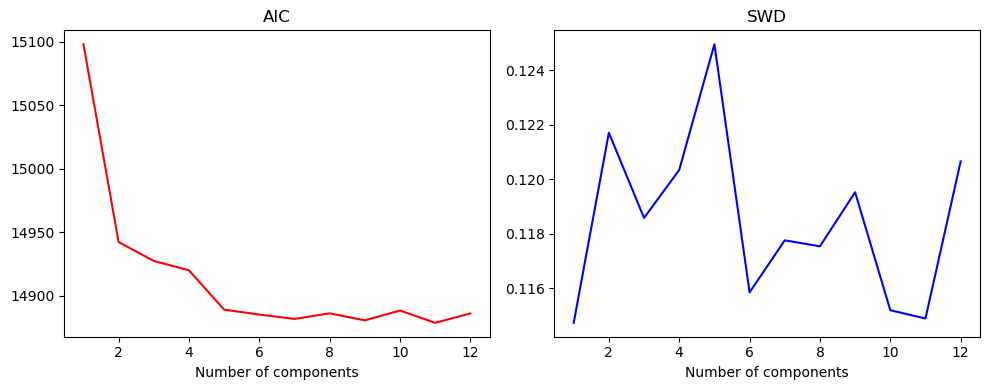

In [60]:
CV_results = pd.DataFrame(dico).T

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(CV_results["AIC"], 'r')
axs[0].set_title('AIC')
axs[0].set_xlabel("Number of components")

axs[1].plot(CV_results["SWD"], 'b')
axs[1].set_title(f'SWD')
axs[1].set_xlabel("Number of components")


plt.tight_layout()
plt.show()


### Bayesian Gaussian Mixture pour identifier le nombre optimal de components

In [41]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=20, n_init=20, random_state=42)
bgm.fit(df_1234)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

BayesianGaussianMixture(n_components=20, n_init=20, random_state=42)

In [42]:
bgm.weights_.round(2)
# On dirait que identifie 10 comme le nombre optimal de components

array([0.06, 0.07, 0.08, 0.16, 0.  , 0.15, 0.12, 0.17, 0.05, 0.09, 0.04,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [44]:
sum(bgm.weights_.round(2) > 0)

10

In [63]:
sum(bgm.weights_.round(1) > 0)

9

### Noise

In [287]:
from joblib import dump

gm = GaussianMixture(n_components=10, n_init=10)
gm.fit(df_1234)

dump(gm, 'gmm.joblib')

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

['gmm.joblib']

In [310]:
from joblib import load

loaded_model = load('gmm.joblib')

loaded_model.sample(1000)[0].std(axis =0)

array([1.24289605, 1.58067802, 1.80431214, 1.91540178])

In [311]:
loaded_model.weights_

array([0.05616315, 0.11377131, 0.07668487, 0.08098108, 0.17712664,
       0.13187512, 0.12228371, 0.08830774, 0.03054224, 0.12226413])

In [312]:
loaded_model.means_

array([[ 4.50508563,  4.87699686,  5.84931759,  2.3942565 ],
       [ 5.50451128,  7.3335628 , 10.41229357,  3.6558231 ],
       [ 5.62167671,  4.62230929, 10.47068368,  1.25980192],
       [ 6.7444606 ,  6.38592471, 11.03228466,  3.15444678],
       [ 4.38234678,  5.43645101,  9.46538743,  1.81624169],
       [ 5.26232347,  4.77118636,  9.34064421,  4.16253576],
       [ 4.43321723,  7.16395015,  8.83664267,  4.06273225],
       [ 6.03946999,  7.21282818,  9.47580384,  7.01677667],
       [ 6.33468035,  9.53635676, 10.66080639,  4.53294692],
       [ 6.29200084,  6.48372822,  8.409614  ,  2.36330353]])

In [313]:
loaded_model.covariances_

array([[[ 4.50576688e-01, -1.05924057e-01,  1.00175732e-01,
         -3.46322893e-02],
        [-1.05924057e-01,  1.11482980e+00, -1.03496221e-01,
          5.24188242e-01],
        [ 1.00175732e-01, -1.03496221e-01,  5.83339190e-01,
         -1.23515333e-01],
        [-3.46322893e-02,  5.24188242e-01, -1.23515333e-01,
          2.37267892e+00]],

       [[ 9.31432945e-01, -1.64164501e-02, -1.26940683e-01,
         -2.87181341e-01],
        [-1.64164501e-02,  9.39707311e-01,  1.82013425e-02,
          3.87215449e-01],
        [-1.26940683e-01,  1.82013425e-02,  1.50037898e+00,
          5.41428554e-02],
        [-2.87181341e-01,  3.87215449e-01,  5.41428554e-02,
          1.75313480e+00]],

       [[ 7.36109839e-01,  3.81849614e-02,  4.16150417e-02,
          3.02409361e-01],
        [ 3.81849614e-02,  4.92853143e-01, -4.34604868e-02,
         -6.96289597e-02],
        [ 4.16150417e-02, -4.34604868e-02,  2.40966293e+00,
         -5.90570824e-02],
        [ 3.02409361e-01, -6.96289597e-

In [314]:
weights = loaded_model.weights_
means = loaded_model.means_
covariances = loaded_model.covariances_

noise = np.load('data/noise.npy')[:, :4]

simul = np.zeros((4,10_000))
for j in range(10000):
    component_idx = np.random.choice(np.arange(len(weights)), p=weights)
    S = np.linalg.cholesky(covariances[component_idx])
    simul[:, j] = S @ noise[j, :] + means[component_idx]

simul = simul * (simul > 0)

In [315]:
simul.std(axis=1)

array([1.27296823, 1.65126643, 1.78179668, 1.89753649])

In [316]:
simul.T

array([[ 6.64749076,  4.94579585, 10.85762473,  4.82547057],
       [ 4.0326764 ,  6.13777063,  5.47157775,  1.95453331],
       [ 4.410824  ,  4.33104496, 12.85994807,  4.47762669],
       ...,
       [ 4.98123015,  6.1135349 , 10.95782884,  1.54728926],
       [ 3.51048513,  4.67735018, 10.5491588 ,  4.97760883],
       [ 3.8530681 ,  7.88348013,  8.56673622,  4.83710991]])

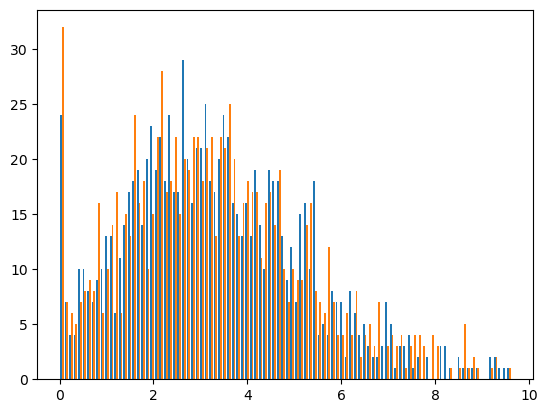

In [317]:
plt.hist([simul[3][:1000], df_1234["YIELD_4"]], bins=100)
plt.show()

In [318]:
yields_espsilon = pd.read_csv('CSVs/yields_subset.csv').iloc[:, 2:].to_numpy()
noise = np.load('data/noise.npy')[:, :4]
loaded_model = load('gmm.joblib')


weights = loaded_model.weights_
means = loaded_model.means_
covariances = loaded_model.covariances_

simul = np.zeros((4,10_000))
for j in range(10000):
    component_idx = np.random.choice(np.arange(len(weights)), p=weights)
    S = np.linalg.cholesky(covariances[component_idx])
    simul[:, j] = S @ noise[j] + means[component_idx]

simul = (simul * (simul > 0)).T

print(ot.sliced.sliced_wasserstein_distance(yields_espsilon, simul, seed=0))

0.061453803422615014


In [319]:
for i in range(10):
    print(ot.sliced.sliced_wasserstein_distance(yields_espsilon, simul[1000 * i: 1000 * (i + 1)], seed=0))

0.09893847550540882
0.09605430274481205
0.10580162107466116
0.10085629461948355
0.08813509760889193
0.14515764032374098
0.09748405336716448
0.0939027089000627
0.10310391495023458
0.0975128132633005


# PHASE 2

In [79]:
# Preparing the data

df_3 = pd.read_csv('data\station_40.csv')
df_1 = pd.read_csv('data\station_49.csv')
df_4 = pd.read_csv('data\station_63.csv')
df_2 = pd.read_csv('data\station_80.csv')

col1 = [col + '_1' for col in df_1.columns]
col2 = [col + '_2' for col in df_2.columns]
col3 = [col + '_3' for col in df_3.columns]
col4 = [col + '_4' for col in df_4.columns]
col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

df_1.columns = col1
df_2.columns = col2
df_3.columns = col3
df_4.columns = col4

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_10_4,W_11_4,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.462204,3.951453,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.036085,0.879651,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.295700,2.556876,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.872424,3.686682,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,2.240781,2.920387,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40


In [7]:
# Reorganising columns

full_df = full_df[['YEAR', 'W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1',
       'W_8_1', 'W_9_1', 'W_10_1', 'W_11_1', 'W_12_1', 'W_13_1', 'W_14_1',
       'W_15_1', 'W_16_1', 'W_17_1', 'W_18_1', 'W_1_2', 'W_2_2',
       'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2', 'W_10_2',
       'W_11_2', 'W_12_2', 'W_13_2', 'W_14_2', 'W_15_2', 'W_16_2', 'W_17_2',
       'W_18_2', 'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3',
       'W_6_3', 'W_7_3', 'W_8_3', 'W_9_3', 'W_10_3', 'W_11_3', 'W_12_3',
       'W_13_3', 'W_14_3', 'W_15_3', 'W_16_3', 'W_17_3', 'W_18_3',
       'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4',
       'W_9_4', 'W_10_4', 'W_11_4', 'W_12_4', 'W_13_4', 'W_14_4', 'W_15_4',
       'W_16_4', 'W_17_4', 'W_18_4', 'YIELD_1','YIELD_2', 'YIELD_3', 'YIELD_4']]

In [80]:
full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_10_4,W_11_4,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.462204,3.951453,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.036085,0.879651,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.295700,2.556876,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.872424,3.686682,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,2.240781,2.920387,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40


In [81]:
# Adding T and R

full_df["T"] = np.sum(full_df[['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1','W_8_1', 'W_9_1', 
                'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2',
                'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3','W_6_3', 'W_7_3', 'W_8_3', 'W_9_3',
                'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4'
                ]], axis=1) / 36

full_df["R"] = np.sum(full_df[['W_13_1', 'W_14_1','W_15_1', 'W_13_2', 'W_14_2', 'W_15_2', 
                'W_13_3', 'W_14_3', 'W_15_3', 'W_13_4', 'W_14_4', 'W_15_4'
                ]], axis=1) / 12

full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4,T,R
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97,22.404683,2.122557
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77,22.910263,1.443749
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65,23.096885,1.401006
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07,21.252078,1.563658
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40,23.344850,1.398759


In [82]:
# Creating masks

cold = full_df["T"] <= 21.2
mild = (full_df["T"] > 21.2) & (full_df["T"] <= 22)
hot = full_df["T"] > 22

low_rain = full_df["R"] <= 1.8
mild_rain = (full_df["R"] > 1.8) & (full_df["R"] <= 2.2)
strong_rain = full_df["R"] > 2.2

temps = [cold, mild, hot]
rains = [low_rain, mild_rain, strong_rain]

In [83]:
# Creating the local dataframes and storing them in a dico

dico = {i : {"df": None} for i in range(1, 10)}
i = 1
for rain in rains:
    for temp in temps:
        dico[i]["df"] = full_df[rain][temp]
        print(dico[i]["df"].shape)
        i += 1

(464, 79)
(1290, 79)
(1678, 79)
(534, 79)
(1254, 79)
(1082, 79)
(1007, 79)
(1690, 79)
(1001, 79)


In [ ]:
# On a maintenant un bon dico pour travailler !!

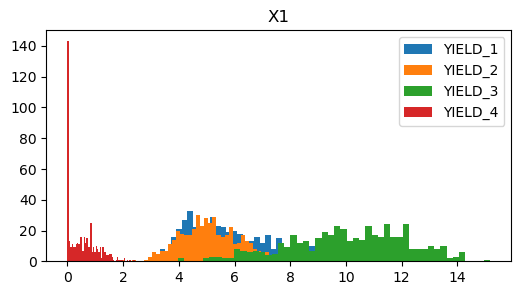

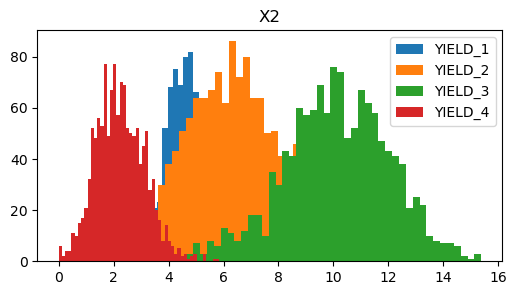

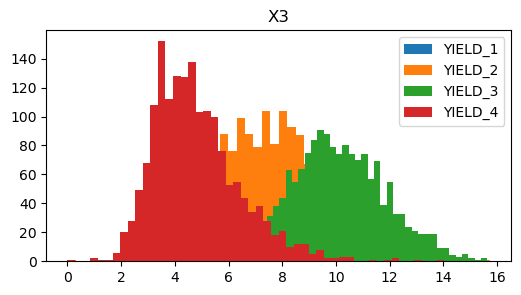

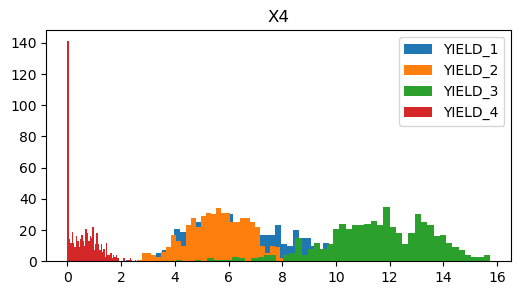

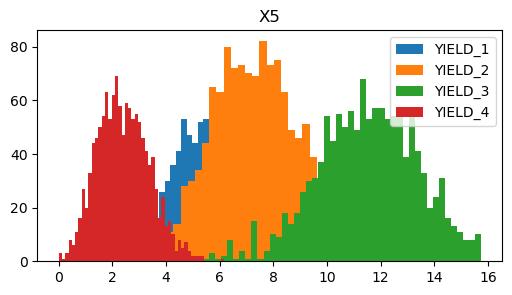

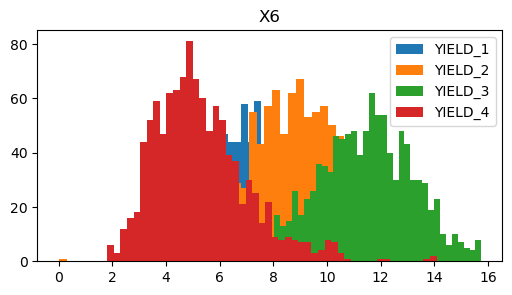

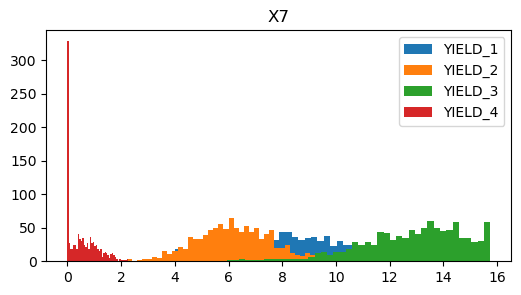

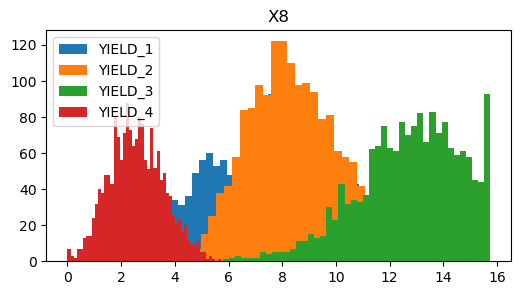

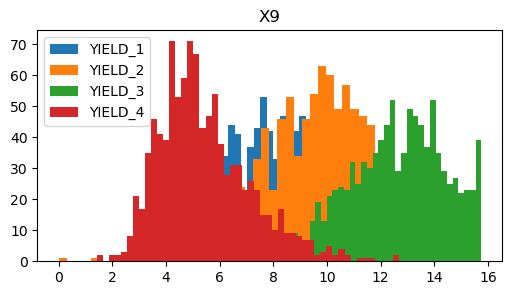

In [84]:
# let's have a look

yields = ["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]
for i in dico:
    plt.figure(figsize=(6,3))
    for y in yields:
        plt.hist(dico[i]["df"][y], bins=50, label=f"{y}")
    plt.title(f"X{i}")
    plt.legend()
    plt.show()

### Modelling with Gaussian Mixture

In [86]:
# Getting the optimal number of components from a BGM

from sklearn.mixture import BayesianGaussianMixture
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

for i in dico:
    bgm = BayesianGaussianMixture(n_components=20, n_init=10, random_state=42)
    bgm.fit(dico[i]["df"][yields])
    dico[i]["bgm"] = bgm
    dico[i]["bgm_weights"] = bgm.weights_.round(1)    

In [87]:
# Storing them

for i in dico:
    print(i, (dico[i]["bgm_weights"] > 0).sum())
    dico[i]["optimal_components"] = (dico[i]["bgm_weights"] > 0).sum()

1 7
2 7
3 8
4 4
5 5
6 6
7 4
8 7
9 7


In [88]:
# Training a GM for each subset
# Generating a sample for each of them

from sklearn.mixture import GaussianMixture

for i in range(1,10):
    gm = GaussianMixture(n_components=dico[i]["optimal_components"], n_init=10)
    gm.fit(dico[i]["df"][yields])
    dico[i]["gm"] = gm
    dico[i]["sample"] = gm.sample(len(dico[i]["df"]))[0]
    dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
    dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
    print(i, dico[i]["sample"].shape)


1 (464, 4)
2 (1290, 4)
3 (1678, 4)
4 (534, 4)
5 (1254, 4)
6 (1082, 4)
7 (1007, 4)
8 (1690, 4)
9 (1001, 4)


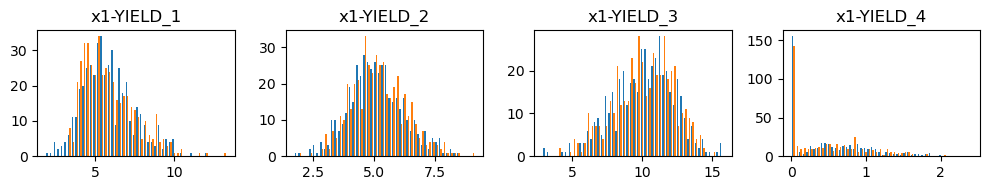

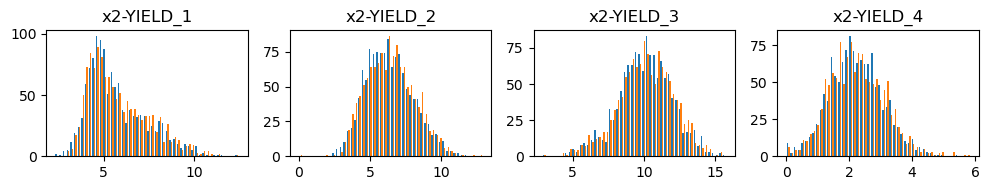

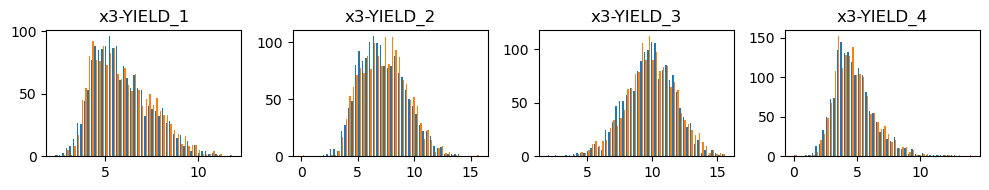

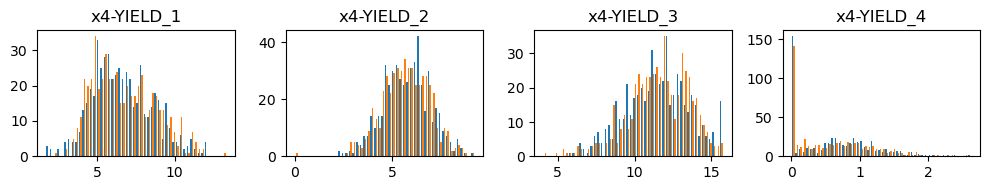

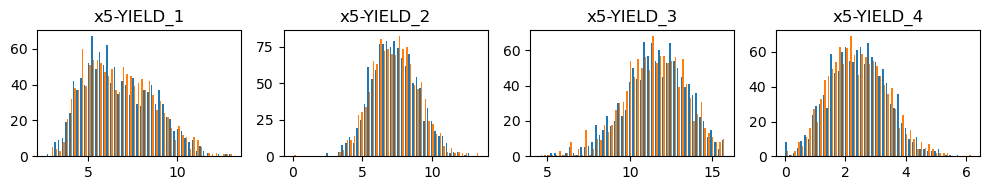

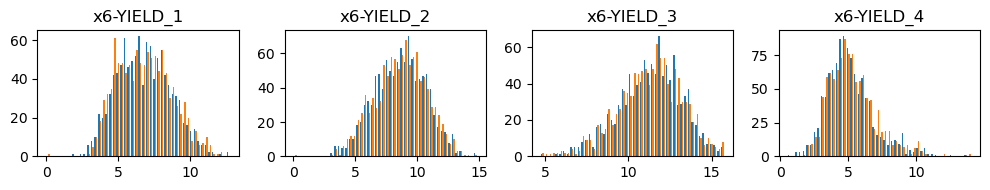

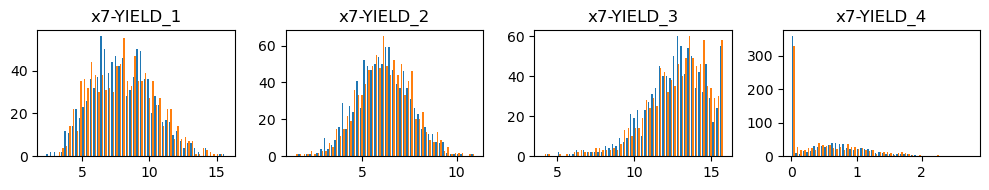

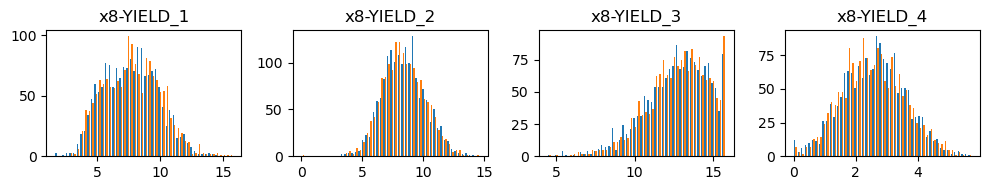

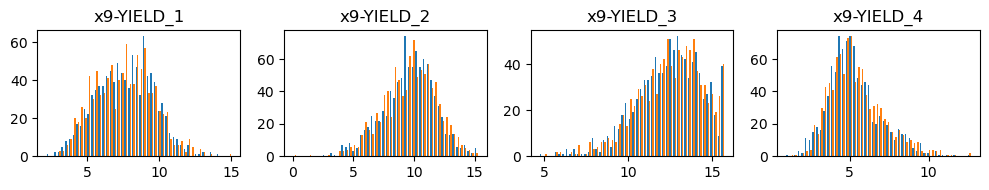

In [89]:
# Let's have a look -- bang bang
for dico_number in range(1,10):
    fig, axs = plt.subplots(1, 4, figsize=(10, 2))
    for i in range(4): 
        axs[i].hist([dico[dico_number]["sample"][:,i], dico[dico_number]["df"][yields[i]]], bins=50)
        axs[i].set_title(f"x{dico_number}-{yields[i]}")
    plt.tight_layout()
    plt.show()

In [100]:
# Displaying the SWDs
SWDs = []

for i in range(1, 10):
    true_yield = dico[i]["df"][yields].to_numpy()
    dico[i]["SWD"] = ot.sliced.sliced_wasserstein_distance(true_yield, dico[i]["sample"], seed=0)
    SWDs.append(dico[i]["SWD"])
    print(f"{i} SWD: {dico[i]['SWD']}")

print(f"\n Mean SWD: {np.mean(SWDs)}")

1 SWD: 0.1494724173052161
2 SWD: 0.08738305652271
3 SWD: 0.10177980033066224
4 SWD: 0.16114167092187578
5 SWD: 0.08944277235615616
6 SWD: 0.11949330877646834
7 SWD: 0.1410807932279809
8 SWD: 0.1255289752108854
9 SWD: 0.14405378020681978

 Mean SWD: 0.1243751749843083
